In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels

In [4]:
clima = pd.read_csv('/content/seattle-weather.csv')
clima

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [5]:
climadrop = clima.drop(columns=['date'])

In [7]:
x = climadrop.loc[:, climadrop.columns != 'weather']
y = climadrop.loc[:, ['weather']]

In [8]:
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [9]:
y

,weather
0,drizzle
1,rain
2,rain
3,rain
4,rain
...,...
1456,rain
1457,rain
1458,fog
1459,sun


In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=7)

In [11]:
X_train.shape, X_test.shape, x.shape

((1095, 4), (366, 4), (1461, 4))

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [28]:
y_pred = model.predict(X_test)

In [14]:
y_train = y_train.values.ravel() ##

In [29]:
kf = KFold(n_splits=10, shuffle=True, random_state=23)
scores = cross_val_score(model, X_train, y_train, cv=kf)
mean_accuracy = scores.mean()
print("Precisión promedio de validación cruzada:", mean_accuracy)

Precisión promedio de validación cruzada: 0.853002502085071


In [19]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[  0,   0,   0,   0,  14],
       [  0,   0,   0,   0,  34],
       [  0,   0, 153,   0,  11],
       [  0,   0,   6,   3,   0],
       [  0,   0,   0,   0, 145]])

In [20]:
unique_labels(y_test)

array(['drizzle', 'fog', 'rain', 'snow', 'sun'], dtype='<U7')

In [30]:
def plot(y_true, y_pred):
  labels= unique_labels(y_test)
  column = [f'Predicted {label}' for label in labels]
  indices = [f'Actual {label}' for label in labels]
  table = pd.DataFrame((cnf_matrix), columns=column, index=indices)
  return sns.heatmap(table, annot=True, annot_kws={'size':10}, cmap='Pastel1', cbar=False, fmt='d')

<Axes: >

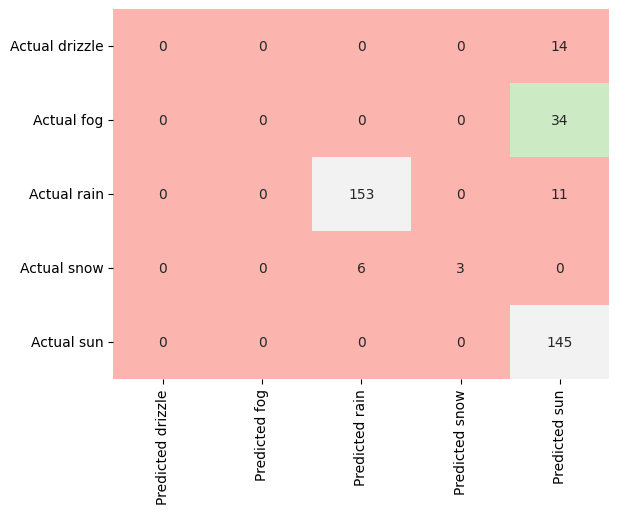

In [31]:
plot(y_test, y_pred)

In [23]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00        14
         fog       0.00      0.00      0.00        34
        rain       0.96      0.93      0.95       164
        snow       1.00      0.33      0.50         9
         sun       0.71      1.00      0.83       145

    accuracy                           0.82       366
   macro avg       0.53      0.45      0.46       366
weighted avg       0.74      0.82      0.77       366



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
clima['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64